<a href="https://colab.research.google.com/github/ErnestoFCh/Simulacion-II/blob/main/Proyecto_SIM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Individual:
    def __init__(self):
        self.infected = False

    def get_infected(self):
        self.infected = True

    def recover(self):
        self.infected = False

    def healthy(self):
      self.infected = False

In [ ]:
class Region:
    def __init__(self):
        self.population = []

    def create_population(self, pop_total):
        for i in range(pop_total):
            self.population.append(Individual())

    def start_infection(self, inf_total):
        infected = np.random.choice(self.population,
                                    inf_total,
                                    replace=False)
        for i in infected:
            i.get_infected()

In [ ]:
class Simulation:
    def __init__(self, inputs):
        self.inputs = inputs
        self.set_region()

    def set_region(self):
        self.region = Region()
        self.region.create_population(self.inputs['total population'])
        self.region.start_infection(self.inputs['initial infected'])

    def infected_total(self):
        return sum(1 for i in self.region.population if i.infected)

    def recovered_total(self):
        return self.inputs['total population'] - self.infected_total()

    def simulate(self):
        total_infected = [self.inputs['initial infected']]
        total_recovered = [self.recovered_total()]

        for t in range(self.inputs['simulation time']):
            for ind in self.region.population:
                if ind.infected and np.random.rand() <= self.inputs['recovery rate']:
                    ind.recover()
                elif not ind.infected:
                    interactions = np.random.choice(
                        self.region.population,
                        self.inputs['interaction rate'],
                        replace=False
                    )
                    for interaction in interactions:
                        if interaction.infected and np.random.rand() <= self.inputs['infection rate']:
                            ind.get_infected()
                            if np.random.rand() <= self.inputs['face mask']:
                                ind.healthy()


            total_infected.append(self.infected_total())
            total_recovered.append(self.recovered_total())

        # Gráfica
        #plt.style.use('seaborn-v0_8-notebook')
        #plt.figure()
        #plt.title('Simulación de infección con mascarilla')
        #plt.title('Simulación de infección')
        #plt.xlabel('Tiempo')
        #plt.ylabel('Número de individuos')
        #plt.plot(range(len(total_infected)), total_infected, label='Infectados', color='red')
        #plt.plot(range(len(total_recovered)), total_recovered, label='No infectados', color='green')
        #plt.legend()
        #plt.savefig('Grafico.png')
        #plt.show()

        return total_infected[-1], total_recovered[-1]

In [ ]:
# Configuración de la simulación sin mascarilla
simulation_inputs = {
    'total population': 100,
    'initial infected': 1,
    'interaction rate': 13,
    'infection rate': 0.4,
    'recovery rate': 0.75,
    'simulation time': 365
}

In [ ]:
# Crear y ejecutar la simulación
app = Simulation(simulation_inputs)

Resultados finales:
Total infectados: 65
Total no infectados: 35


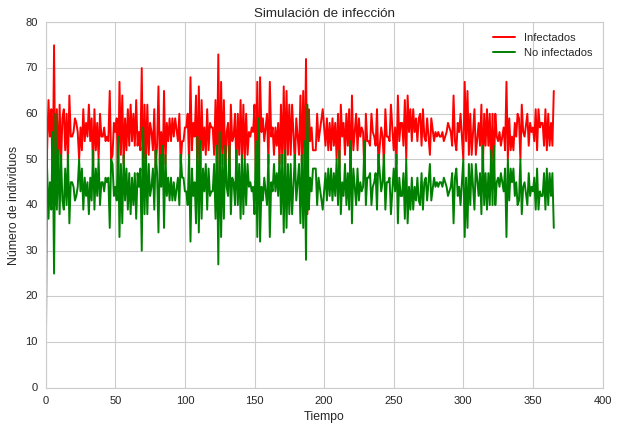

Resultados finales:
Total infectados: 65
Total no infectados: 35


In [ ]:
total_infected, total_recovered = app.simulate()

print(f"Resultados finales:")
print(f"Total infectados: {total_infected}")
print(f"Total no infectados: {total_recovered}")

In [ ]:
def estimacion(N):
  l = []
  sum = 0
  for i in range(N):
    total_infected, _ = app.simulate()
    sum = sum + total_infected
    prob = sum/(i+1)
    l.append(prob)
  return l

In [ ]:
G=estimacion(100)

In [ ]:
from scipy import stats

Media:  55.973757642082575
Error estandar de la media:  0.041982476760155145
Intervalo de confianza del 95%: (55.890455300028755, 56.057059984136394)


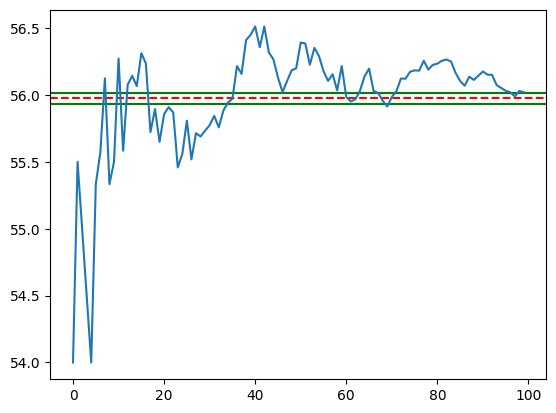

In [ ]:
media = np.mean(G) #calculamos la media de las medias de la muestra
desv = np.std(G, ddof=1) / np.sqrt(len(G))   #Calculamos el error estandar de la media

# Calculamos el intervalo de confianza del 95%
confianza = 0.95
grados_libertad = len(G) - 1
intervalo_confianza = stats.t.interval(confianza, grados_libertad, loc=media, scale=desv)

print("Media: ", media)
print("Error estandar de la media: ", desv)
print("Intervalo de confianza del 95%:", intervalo_confianza)

#Graficamos un intervalo de confianza de un error estandar
plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.savefig('Grafico1.png')
plt.show()

In [ ]:
N = 5

In [ ]:
def simulacion(M):
  r=[]
  for i in range(M):
    R=estimacion(N)
    r.append(R[-1])
  return r

In [ ]:
S=simulacion(100)

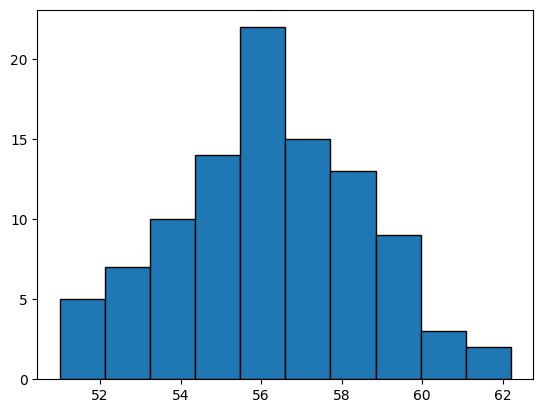

In [ ]:
plt.hist(S, bins=10,edgecolor='black')
plt.savefig('Grafico2.png')
plt.show()

In [ ]:
media=np.mean(S) #calculamos la media de las medias de la muestra
desv=np.std(S)   #Calculamos el error estandar de la media

print("Media: ", media)
print("Error estandar de la media: ", desv)

Media:  56.205999999999996
Error estandar de la media:  2.3747766210740746


In [ ]:
# Configuración de la simulación con mascarilla
simulation_inputs = {
    'total population': 100,
    'initial infected': 1,
    'interaction rate': 13,
    'infection rate': 0.4,
    'recovery rate': 0.75,
    'face mask': 0.5,
    'simulation time': 365
}

In [ ]:
# Crear y ejecutar la simulación
app = Simulation(simulation_inputs)

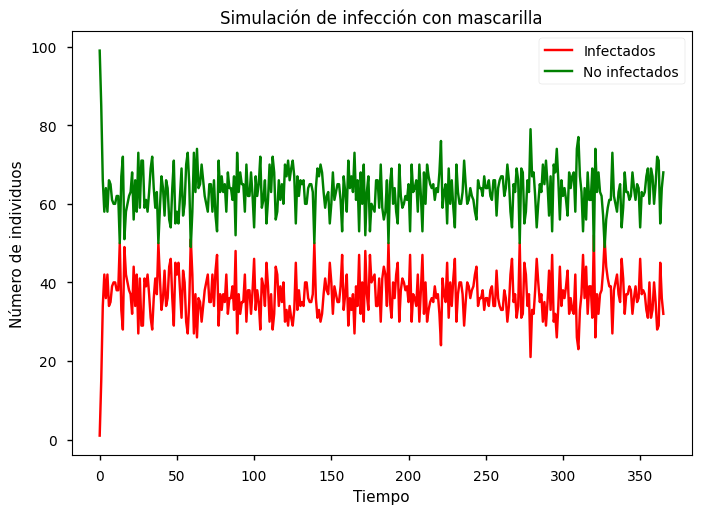

Resultados finales:
Total infectados: 32
Total no infectados: 68


In [ ]:
total_infected, total_recovered = app.simulate()

print(f"Resultados finales:")
print(f"Total infectados: {total_infected}")
print(f"Total no infectados: {total_recovered}")

In [ ]:
G=estimacion(100)

Media:  35.81164026635722
Error estandar de la media:  0.12575419846235442
Intervalo de confianza del 95%: (35.562116654044836, 36.06116387866961)


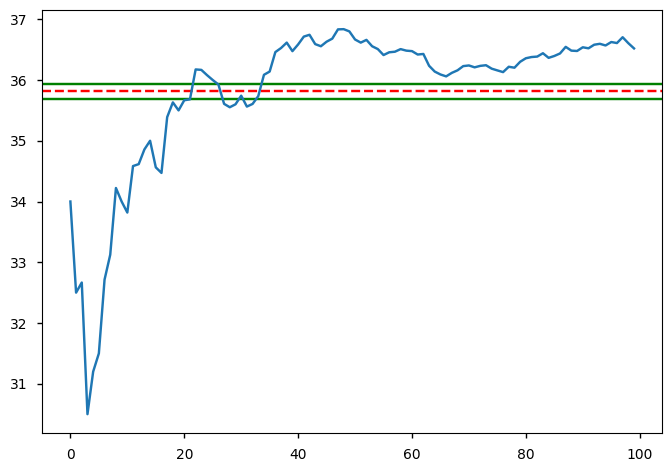

In [ ]:
media = np.mean(G) #calculamos la media de las medias de la muestra
desv = np.std(G, ddof=1) / np.sqrt(len(G))   #Calculamos el error estandar de la media

# Calculamos el intervalo de confianza del 95%
confianza = 0.95
grados_libertad = len(G) - 1
intervalo_confianza = stats.t.interval(confianza, grados_libertad, loc=media, scale=desv)

print("Media: ", media)
print("Error estandar de la media: ", desv)
print("Intervalo de confianza del 95%:", intervalo_confianza)

#Graficamos un intervalo de confianza de un error estandar
plt.axhline(media,color='r',linestyle='--') #media
plt.axhline((desv+media),color='g') #limite superior del intervalo
plt.axhline((-desv+media),color='g') #limite inferior del intervalo
plt.plot(G)
plt.savefig('Grafico_mask1.png')
plt.show()

In [ ]:
N = 5

In [ ]:
K = simulacion(100)

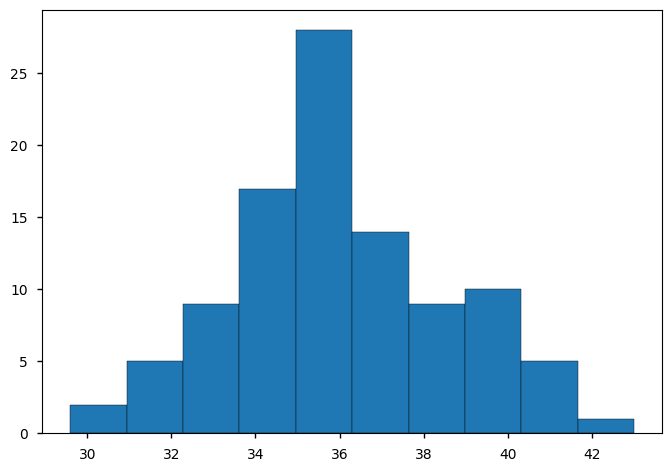

In [64]:
plt.hist(K, bins=10,edgecolor='black')
plt.savefig('Grafico_mask2.png')
plt.show()

In [ ]:
media=np.mean(K) #calculamos la media de las medias de la muestra
desv=np.std(K)   #Calculamos el error estandar de la media

print("Media: ", media)
print("Error estandar de la media: ", desv)

Media:  36.03
Error estandar de la media:  2.5715948358946443
